In [6]:
commodity_dict = {
    "arhar": "static/Arhar.csv",
    "bajra": "static/Bajra.csv",
    "barley": "static/Barley.csv",
    "copra": "static/Copra.csv",
    "cotton": "static/Cotton.csv",
    "sesamum": "static/Sesamum.csv",
    "gram": "static/Gram.csv",
    "groundnut": "static/Groundnut.csv",
    "jowar": "static/Jowar.csv",
    "maize": "static/Maize.csv",
    "masoor": "static/Masoor.csv",
    "moong": "static/Moong.csv",
    "niger": "static/Niger.csv",
    "paddy": "static/Paddy.csv",
    "ragi": "static/Ragi.csv",
    "rape": "static/Rape.csv",
    "jute": "static/Jute.csv",
    "safflower": "static/Safflower.csv",
    "soyabean": "static/Soyabean.csv",
    "sugarcane": "static/Sugarcane.csv",
    "sunflower": "static/Sunflower.csv",
    "urad": "static/Urad.csv",
    "wheat": "static/Wheat.csv"
}

In [7]:
annual_rainfall = [29, 21, 37.5, 30.7, 52.6, 150, 299, 251.7, 179.2, 70.5, 39.8, 10.9]
base = {
    "Paddy": 1245.5,
    "Arhar": 3200,
    "Bajra": 1175,
    "Barley": 980,
    "Copra": 5100,
    "Cotton": 3600,
    "Sesamum": 4200,
    "Gram": 2800,
    "Groundnut": 3700,
    "Jowar": 1520,
    "Maize": 1175,
    "Masoor": 2800,
    "Moong": 3500,
    "Niger": 3500,
    "Ragi": 1500,
    "Rape": 2500,
    "Jute": 1675,
    "Safflower": 2500,
    "Soyabean": 2200,
    "Sugarcane": 2250,
    "Sunflower": 3700,
    "Urad": 4300,
    "Wheat": 1350

}

In [8]:
import pandas as pd

production=pd.read_csv('bajra.csv')
production['Year']=pd.to_datetime(production['Year'],format="%Y")


In [9]:
production

,Year,Production
0,2000-01-01,5.78
1,2001-01-01,6.76
2,2002-01-01,8.28
3,2003-01-01,4.72
4,2004-01-01,12.11
5,2005-01-01,7.93
6,2006-01-01,7.68
7,2007-01-01,8.42
8,2008-01-01,9.97
9,2009-01-01,8.89


In [10]:

production.set_index('Year',inplace=True)
from statsmodels.tsa.stattools import adfuller

In [11]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [12]:
adfuller_test(production['Production'])



ADF Test Statistic : -3.5202213677174936
p-value : 0.007482702189052032
#Lags Used : 1
Number of Observations Used : 17
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [13]:
production['WPI First Difference'] = production['Production'] - production['Production'].shift(1)

In [14]:
production['Production'].shift(1)

Year
2000-01-01      NaN
2001-01-01     5.78
2002-01-01     6.76
2003-01-01     8.28
2004-01-01     4.72
2005-01-01    12.11
2006-01-01     7.93
2007-01-01     7.68
2008-01-01     8.42
2009-01-01     9.97
2010-01-01     8.89
2011-01-01     6.51
2012-01-01    10.37
2013-01-01    10.28
2014-01-01     8.74
2015-01-01     9.25
2016-01-01     9.18
2017-01-01     8.07
2018-01-01     9.73
Name: Production, dtype: float64

<Axes: xlabel='Year'>

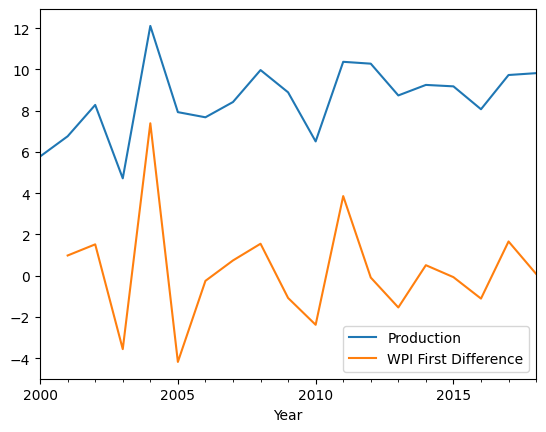

In [15]:
import matplotlib.pyplot as plt
production.plot()

In [16]:
from statsmodels.tsa.stattools import adfuller
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [17]:
production['WPI First Difference'] = production['Production'] - production['Production'].shift(10)

In [18]:
production.tail(30)

,Production,WPI First Difference
Year,,
2000-01-01,5.78,NaN
2001-01-01,6.76,NaN
2002-01-01,8.28,NaN
2003-01-01,4.72,NaN
2004-01-01,12.11,NaN
2005-01-01,7.93,NaN
2006-01-01,7.68,NaN
2007-01-01,8.42,NaN
2008-01-01,9.97,NaN


In [19]:
adfuller_test(production['WPI First Difference'].dropna())

ADF Test Statistic : -3.1757175150935466
p-value : 0.021433976668079866
#Lags Used : 0
Number of Observations Used : 8
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Year'>

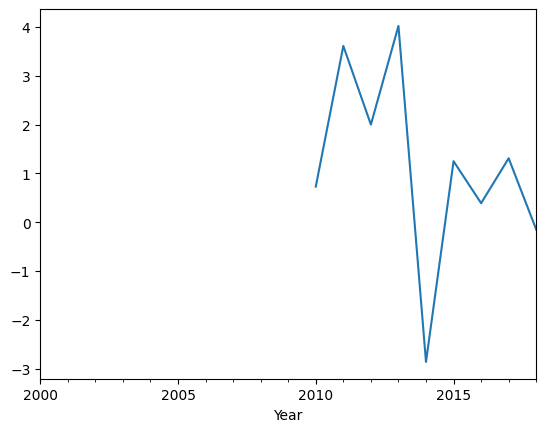

In [20]:
production['WPI First Difference'].plot()

In [21]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

In [22]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(production['Production'],order=(1,1,1))
model_fit=model.fit()

c:\Users\rouna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\rouna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\rouna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


,Production,WPI First Difference,forecast
Year,,,
2014-01-01,9.25,-2.86,8.716983
2015-01-01,9.18,1.25,8.717747
2016-01-01,8.07,0.39,8.717503
2017-01-01,9.73,1.31,8.717581
2018-01-01,9.82,-0.15,8.717556


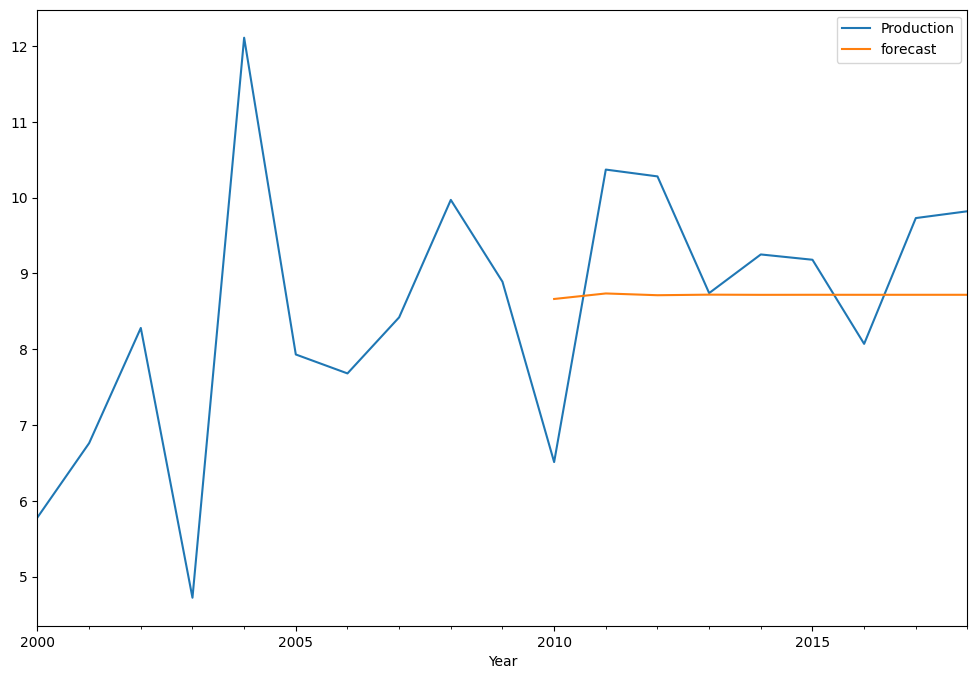

In [23]:
production['forecast']=model_fit.predict(start=10,end=20,dynamic=True)
production[['Production','forecast']].plot(figsize=(12,8))
production.tail()

In [24]:
model=sm.tsa.statespace.SARIMAX(production['Production'],order=(1, 1, 1),seasonal_order=(1,1,1,9))
results=model.fit()

c:\Users\rouna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\rouna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\rouna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\rouna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  

<Axes: xlabel='Year'>

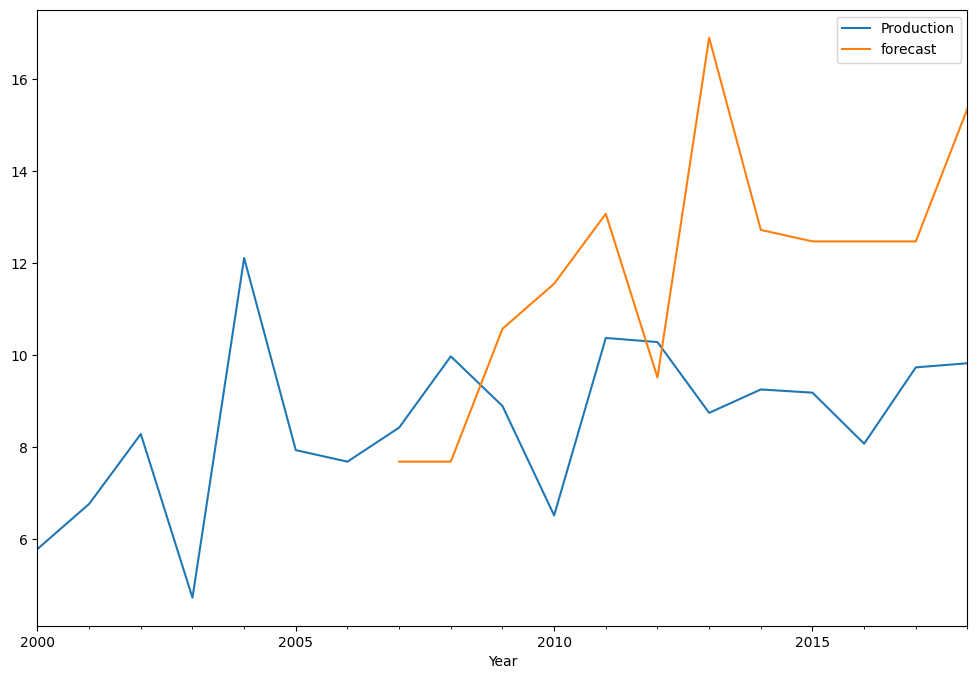

In [25]:
production['forecast']=results.predict(start=7,end=19,dynamic=True)
production[['Production','forecast']].plot(figsize=(12,8))

In [26]:
from pandas.tseries.offsets import DateOffset
future_dates=[production.index[-1]+ DateOffset(years=x)for x in range(0,10)]

In [27]:
future_dates

[Timestamp('2018-01-01 00:00:00'),
 Timestamp('2019-01-01 00:00:00'),
 Timestamp('2020-01-01 00:00:00'),
 Timestamp('2021-01-01 00:00:00'),
 Timestamp('2022-01-01 00:00:00'),
 Timestamp('2023-01-01 00:00:00'),
 Timestamp('2024-01-01 00:00:00'),
 Timestamp('2025-01-01 00:00:00'),
 Timestamp('2026-01-01 00:00:00'),
 Timestamp('2027-01-01 00:00:00')]

In [28]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=production.columns)
future_df=pd.concat([production,future_datest_df])

C:\Users\rouna\AppData\Local\Temp\ipykernel_15224\4079626983.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([production,future_datest_df])


<Axes: >

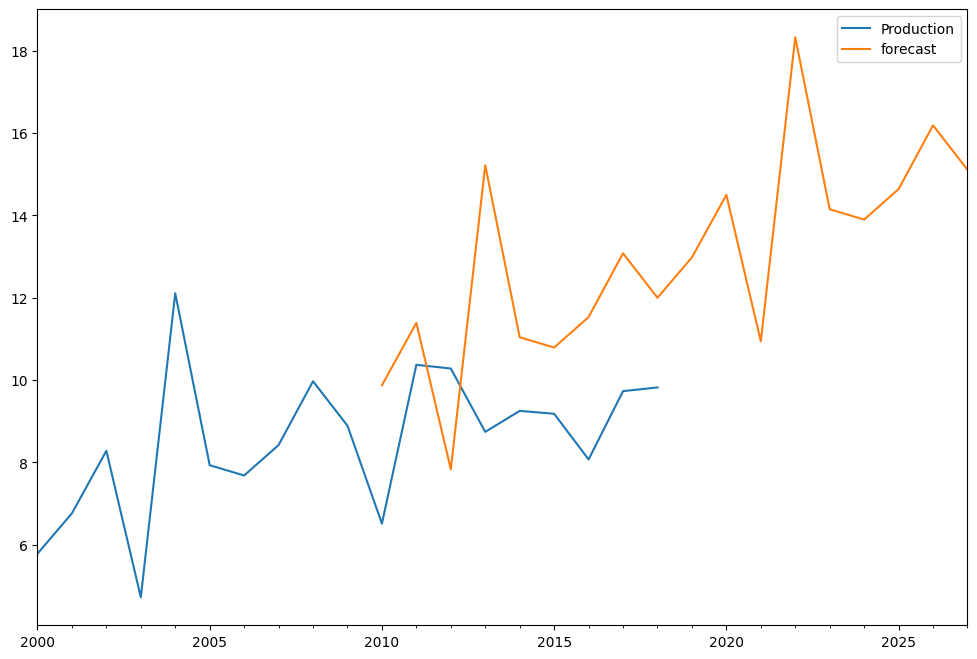

In [29]:
future_df['forecast'] = results.predict(start = 10, end = 27, dynamic= True)  
future_df[['Production', 'forecast']].plot(figsize=(12, 8)) 

In [30]:
future_df.head(50)

,Production,WPI First Difference,forecast
2000-01-01,5.78,NaN,NaN
2001-01-01,6.76,NaN,NaN
2002-01-01,8.28,NaN,NaN
2003-01-01,4.72,NaN,NaN
2004-01-01,12.11,NaN,NaN
2005-01-01,7.93,NaN,NaN
2006-01-01,7.68,NaN,NaN
2007-01-01,8.42,NaN,NaN
2008-01-01,9.97,NaN,NaN
2009-01-01,8.89,NaN,NaN


In [31]:
newproduction=future_df.iloc[18:,:]
newp1=newproduction.drop(['Production','WPI First Difference'],axis=1)
n1=newp1.index.to_numpy()
n2=newp1["forecast"]
n2.reset_index(drop=True).to_numpy()


array([11.99999954, 12.98013752, 14.50022624, 10.93995156, 18.33031785,
       14.15001784, 13.90018864, 14.6400539 , 16.19027897, 15.10999972])

In [32]:
print(n1[0])

2018-01-01T00:00:00.000000000


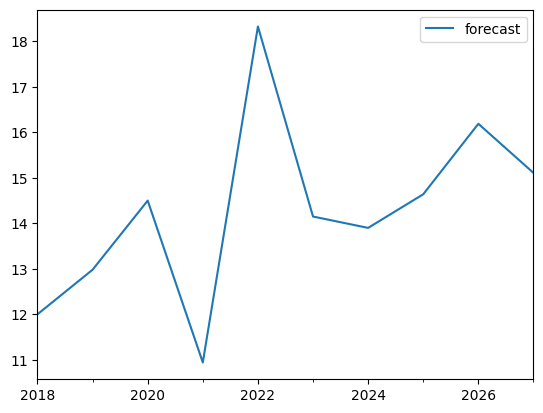

In [33]:
newp1.plot()

plt.plot(n1,n2)